## PYSPARK REGRESSION ALGORITHM

In the following notebook we will be predicting the prices of houses in paris based on
1.SquareMetres
2. Number of rooms
3. Whether it has a  yard or not
4.Whether has a pool or not
5. Number of floors
6.city code
7CityPartRange
8. Number of previous owners
9.is new built
10. Whether has a storm Protector or not
11. Whether has a basement or not
12. Whether has a garage
13. Whether has a storage room or not
14. Has a guest room


In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('housing').getOrCreate()
house_df = spark.read.csv('ParisHousing.csv', header = True, inferSchema = True)
house_df.printSchema()

root
 |-- squareMeters: integer (nullable = true)
 |-- numberOfRooms: integer (nullable = true)
 |-- hasYard: integer (nullable = true)
 |-- hasPool: integer (nullable = true)
 |-- floors: integer (nullable = true)
 |-- cityCode: integer (nullable = true)
 |-- cityPartRange: integer (nullable = true)
 |-- numPrevOwners: integer (nullable = true)
 |-- made: integer (nullable = true)
 |-- isNewBuilt: integer (nullable = true)
 |-- hasStormProtector: integer (nullable = true)
 |-- basement: integer (nullable = true)
 |-- attic: integer (nullable = true)
 |-- garage: integer (nullable = true)
 |-- hasStorageRoom: integer (nullable = true)
 |-- hasGuestRoom: integer (nullable = true)
 |-- price: double (nullable = true)



In the below code we will be looking a the distribution of all the numerical columns in our dataset

In [11]:
house_df.describe().toPandas()

,summary,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,mean,49870.1312,50.3584,0.5087,0.4968,50.2763,50225.4861,5.5101,5.5217,2005.4885,0.4991,0.4999,5033.1039,5028.0106,553.1212,0.503,4.9946,4993447.525749963
2,stddev,28774.37535029503,28.81669636927458,0.4999493023602426,0.5000147612582521,28.88917127111252,29006.675799293178,2.87202417160515,2.8566667927002753,9.308089589340009,0.5000241918339955,0.5000249918746555,2876.7295448116365,2894.3322098165813,262.0501698906411,0.5000160013441162,3.1764098913678978,2877424.109945015
3,min,89,1,0,0,1,3,1,1,1990,0,0,0,1,100,0,0,10313.5
4,max,99999,100,1,1,100,99953,10,10,2021,1,1,10000,10000,1000,1,10,1.00067712E7


Here we will look at the correlation of our indipendent variables in respect to our target variable column

In [12]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to for price ", i, house_df.stat.corr('price',i))

Correlation to for price  squareMeters 0.9999993570640745
Correlation to for price  numberOfRooms 0.009590905935479128
Correlation to for price  hasYard -0.006119244882540526
Correlation to for price  hasPool -0.00507034083386251
Correlation to for price  floors 0.0016542562406504926
Correlation to for price  cityCode -0.001539367348580816
Correlation to for price  cityPartRange 0.008812911660535336
Correlation to for price  numPrevOwners 0.016618826067943387
Correlation to for price  made -0.007209526254690673
Correlation to for price  isNewBuilt -0.010642774359518865
Correlation to for price  hasStormProtector 0.0074959113342807394
Correlation to for price  basement -0.003967482178851144
Correlation to for price  attic -0.000599514077496332
Correlation to for price  garage -0.017229051207338166
Correlation to for price  hasStorageRoom -0.0034852993013792864
Correlation to for price  hasGuestRoom -0.0006439241048174541
Correlation to for price  price 1.0


In [13]:
house_df.dtypes

[('squareMeters', 'int'),
 ('numberOfRooms', 'int'),
 ('hasYard', 'int'),
 ('hasPool', 'int'),
 ('floors', 'int'),
 ('cityCode', 'int'),
 ('cityPartRange', 'int'),
 ('numPrevOwners', 'int'),
 ('made', 'int'),
 ('isNewBuilt', 'int'),
 ('hasStormProtector', 'int'),
 ('basement', 'int'),
 ('attic', 'int'),
 ('garage', 'int'),
 ('hasStorageRoom', 'int'),
 ('hasGuestRoom', 'int'),
 ('price', 'double')]

It identifies the numeric columns in the DataFrame by checking their data types. It creates a list called numeric_features that contains the names of these numeric columns.
It samples 80% of the rows from the DataFrame df using the sample method with a sampling fraction of 0.8. The sampled data is converted to a Pandas DataFrame using the toPandas() method.
It creates a scatter matrix plot using pd.plotting.scatter_matrix function. The scatter matrix plot is a grid of scatter plots where each numeric feature is plotted against all other numeric features. It provides a visual representation of the pairwise relationships between the variables.

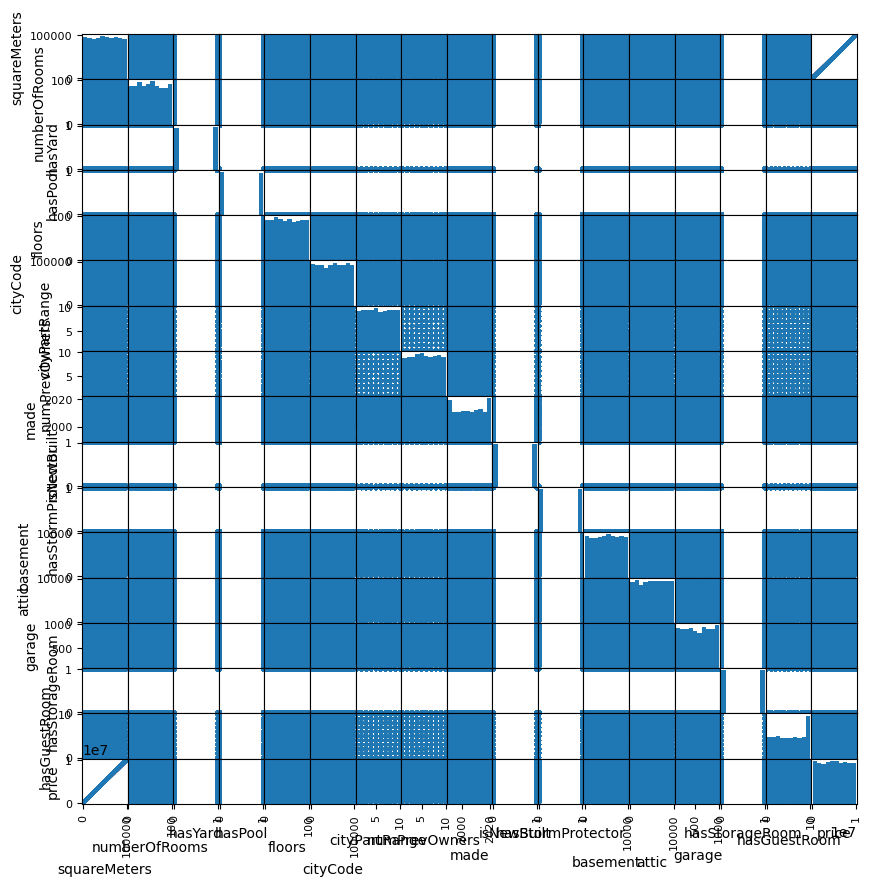

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Your code to read the data and create the DataFrame goes here

numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()

scatter_matrix = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
plt.show()


The VectorAssembler class is imported from the pyspark.ml.feature module.
An instance of VectorAssembler is created with the following parameters:
inputCols: A list of column names representing the input features. In this case, the list contains multiple column names such as 'squareMeters', 'numberOfRooms', 'hasYard', and so on.
outputCol: The name of the output column where the assembled vector will be stored. In this case, it's set to 'features'.
The transform method of the vectorAssembler object is called on the house_df DataFrame. It transforms the DataFrame by adding a new column named 'features', which contains the assembled vector of input features.
The take(1) method is called on the transformed DataFrame vhouse_df. This retrieves the first row of the DataFrame as a list.

The VectorAssembler is commonly used in Spark machine learning pipelines to prepare features for model training. By combining multiple input columns into a single vector column, it enables easier processing and compatibility with Spark ML algorithms that expect input in vector form.

In [19]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = 
['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'
], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)

vhouse_df.take(1)

[Row(squareMeters=75523, numberOfRooms=3, hasYard=0, hasPool=1, floors=63, cityCode=9373, cityPartRange=3, numPrevOwners=8, made=2005, isNewBuilt=0, hasStormProtector=1, basement=4313, attic=9005, garage=956, hasStorageRoom=0, hasGuestRoom=7, price=7559081.5, features=DenseVector([75523.0, 3.0, 0.0, 1.0, 63.0, 9373.0, 3.0, 8.0, 2005.0, 0.0, 1.0, 4313.0, 9005.0, 956.0, 0.0, 7.0]))]

In [20]:
column_list = house_df.columns
print(column_list)


['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']


In [21]:
vhouse_df = vhouse_df.select(['features', 'price'])
vhouse_df.show(3)

+--------------------+---------+
|            features|    price|
+--------------------+---------+
|[75523.0,3.0,0.0,...|7559081.5|
|[80771.0,39.0,1.0...|8085989.5|
|[55712.0,58.0,0.0...|5574642.1|
+--------------------+---------+
only showing top 3 rows



Here we will start the splitting of our dataset into train and test data to begin  training our model

In [22]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

## LINEAR REGRESSION MODEL

The LinearRegression class is imported from the pyspark.ml.regression module.
An instance of LinearRegression is created with the following parameters:
featuresCol: The name of the input column that contains the assembled feature vector. In this case, it's set to 'features'.
labelCol: The name of the column that contains the target variable or label. In this case, it's set to 'price'.
maxIter: The maximum number of iterations for the optimization algorithm. It's set to 10 in this case.
regParam: The regularization parameter for controlling overfitting. It's set to 0.3, which determines the strength of the regularization.
elasticNetParam: The mixing parameter between L1 and L2 regularization. It's set to 0.8, indicating a higher emphasis on L1 regularization (LASSO).
The fit method of the lr object is called on the train_df DataFrame. It fits the linear regression model to the training data and returns a LinearRegressionModel object.
The coefficients of the trained linear regression model are printed using lr_model.coefficients.
The intercept of the trained linear regression model is printed using lr_model.intercept.

In [23]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='price', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [99.9998604435825,0.13189783477533978,2971.0136471264227,2975.1116906751704,55.152661125550274,-0.0011270866020865143,47.13067701099789,7.6812244009179285,-2.5174377046591854,155.6078203686164,139.20167334600671,-0.00113603675428869,-0.012859433418450786,0.03508281364200009,-23.11352883743656,-6.2383816051051815]
Intercept: 5407.045327011325


In [24]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 1889.040452
r2: 1.000000


In [25]:
train_df.describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              6971|
|   mean| 4997398.339348727|
| stddev|2865851.3892346956|
|    min|           13229.1|
|    max|      1.00067712E7|
+-------+------------------+



In [26]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","price","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-------+--------------------+
|        prediction|  price|            features|
+------------------+-------+--------------------+
| 13412.21299624438|10313.5|[89.0,33.0,0.0,0....|
| 20893.24998517955|22670.7|[141.0,16.0,0.0,1...|
| 17820.65029796921|17071.0|[143.0,27.0,0.0,0...|
|22744.813172218073|22160.2|[152.0,80.0,1.0,1...|
|21653.024894486407|19788.5|[163.0,35.0,0.0,0...|
+------------------+-------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 1


Our model is perfoming at its best very rare chances of this but the perfomance of the data on the test and train data is remarkable. The model is perfominga at 100%

In [27]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 1917.21


In [28]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.4999999999999998, 0.40043604065875243, 0.10007765171621154, 0.025005602074799002, 0.0062488357386909525, 0.0015643990212136107, 0.0003915040308262984, 3.1866066193724406e-07, 3.116545191302897e-07, 3.11640767258547e-07, 3.1164073072988173e-07]
+-------------------+
|          residuals|
+-------------------+
|-1958.5151583395382|
| 102.72822811301194|
|-1210.8587521101945|
| 1345.7165726077255|
|  522.6126217857545|
|-215.70660975090868|
|-1014.6057096219192|
|-1127.0246047383553|
|  -2650.87618128931|
| -4928.730973116089|
|-1221.8532469207967|
| -359.5800729904222|
|  751.6107406450465|
| -848.3320761285686|
|-1908.0413337571226|
| -1323.530744865253|
|  36.45461366533709|
| -399.9646513853477|
|  18.14160830793844|
| -3016.322215274442|
+-------------------+
only showing top 20 rows



In [29]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","price","features").show()

+------------------+-------+--------------------+
|        prediction|  price|            features|
+------------------+-------+--------------------+
| 13412.21299624438|10313.5|[89.0,33.0,0.0,0....|
| 20893.24998517955|22670.7|[141.0,16.0,0.0,1...|
| 17820.65029796921|17071.0|[143.0,27.0,0.0,0...|
|22744.813172218073|22160.2|[152.0,80.0,1.0,1...|
|21653.024894486407|19788.5|[163.0,35.0,0.0,0...|
| 18918.19352693172|18985.0|[176.0,30.0,0.0,0...|
|27717.053551680212|26533.9|[187.0,96.0,1.0,1...|
|28282.005658722333|28295.6|[202.0,18.0,1.0,0...|
|27924.199996730098|28656.5|[235.0,86.0,0.0,0...|
|31528.945091030786|30703.1|[272.0,79.0,0.0,1...|
| 34093.63503738733|34115.4|[281.0,52.0,0.0,1...|
| 35659.35212191695|37033.1|[299.0,38.0,1.0,0...|
|35846.600083012745|34373.4|[302.0,23.0,1.0,0...|
|37995.116769691274|37972.0|[350.0,65.0,0.0,0...|
|46146.725738720575|45524.8|[371.0,29.0,1.0,0...|
|48110.814975934496|45184.2|[380.0,4.0,1.0,1....|
| 44571.41026912053|43545.0|[389.0,28.0,0.0,1...|


## DECISION TREE REGRESSOR

In [30]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'price')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 90565.5


In [31]:
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming you already have the required imports and have trained the DecisionTreeRegressor

# Evaluate R2 score on train data
train_predictions = dt_model.transform(train_df)
train_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
train_r2 = train_evaluator.evaluate(train_predictions)
print("R2 score on train data = %g" % train_r2)

# Evaluate R2 score on test data
test_predictions = dt_model.transform(test_df)
test_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
test_r2 = test_evaluator.evaluate(test_predictions)
print("R2 score on test data = %g" % test_r2)


R2 score on train data = 0.999016
R2 score on test data = 0.999027


In [32]:
train_df.take(1)

[Row(features=DenseVector([111.0, 32.0, 0.0, 1.0, 34.0, 80623.0, 1.0, 4.0, 2003.0, 1.0, 0.0, 2239.0, 2795.0, 951.0, 1.0, 7.0]), price=14431.3)]

In [32]:
dt_model.featureImportances

SparseVector(16, {0: 1.0})

In [33]:
house_df.take(1)

[Row(squareMeters=75523, numberOfRooms=3, hasYard=0, hasPool=1, floors=63, cityCode=9373, cityPartRange=3, numPrevOwners=8, made=2005, isNewBuilt=0, hasStormProtector=1, basement=4313, attic=9005, garage=956, hasStorageRoom=0, hasGuestRoom=7, price=7559081.5)]

We can clearly see that our model is perfoming fairly better even whnen using the decision tree regressor thus we wont need to even  tune our model as its perfoming in the best way possible

In [36]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'price', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'price', 'features').show(5)

+------------------+-------+--------------------+
|        prediction|  price|            features|
+------------------+-------+--------------------+
|158637.38199921936|10313.5|[89.0,33.0,0.0,0....|
|149224.13931138755|22670.7|[141.0,16.0,0.0,1...|
|153522.98137022828|17071.0|[143.0,27.0,0.0,0...|
|161004.19926667798|22160.2|[152.0,80.0,1.0,1...|
|155850.09168893698|19788.5|[163.0,35.0,0.0,0...|
+------------------+-------+--------------------+
only showing top 5 rows



In [37]:
gbt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 91112.7


In [38]:
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming you have already imported necessary modules and fitted the GBTRegressor

# Evaluate R2 score on train data
train_predictions = gbt_model.transform(train_df)
train_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
train_r2 = train_evaluator.evaluate(train_predictions)
print("R2 score on train data = %g" % train_r2)

# Evaluate R2 score on test data
test_predictions = gbt_model.transform(test_df)
test_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="r2")
test_r2 = test_evaluator.evaluate(test_predictions)
print("R2 score on test data = %g" % test_r2)


R2 score on train data = 0.999088
R2 score on test data = 0.999016


Also when we use the gradient tree boosting model the perfomance is almost similar to the decison  tree model above thus based on the data we have pyspark woupd really suit our model together with its  general and overall perfomance